# Swimmer

Balance between drag and Marangoni force. 

The Marangoni force is proportional to the gradient of surface tension:

$$
F_M \propto \frac{\partial \gamma}{\partial x}.
$$

The viscous drag is proportional to the velocity:

$$
F_D \propto u.
$$

A model of Marangoni force as a function of velocity:

$$
F_M = C_1 e^{-Pe} I_1(Pe),
$$

where $Pe=\frac{ua}{2D}$ is the Peclet number. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv

(0.0, 0.5)

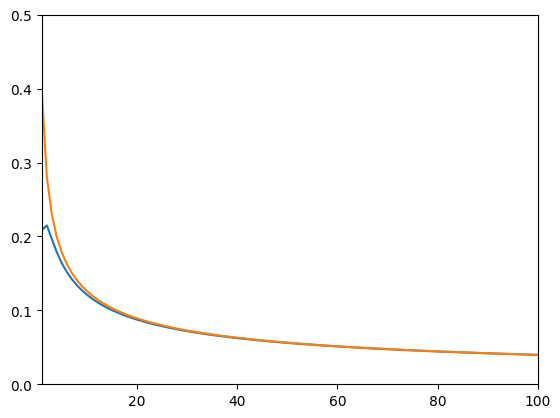

In [15]:
Pe = np.linspace(0.001, 100, 100)
C1 = 1.0
FM = C1 * np.exp(-Pe) * iv(1, Pe)
FM2 = 1/(2*np.pi*Pe)**.5
plt.plot(Pe, FM)
plt.plot(Pe, FM2)
plt.xlim(1, 100)
plt.ylim(0, 0.5)

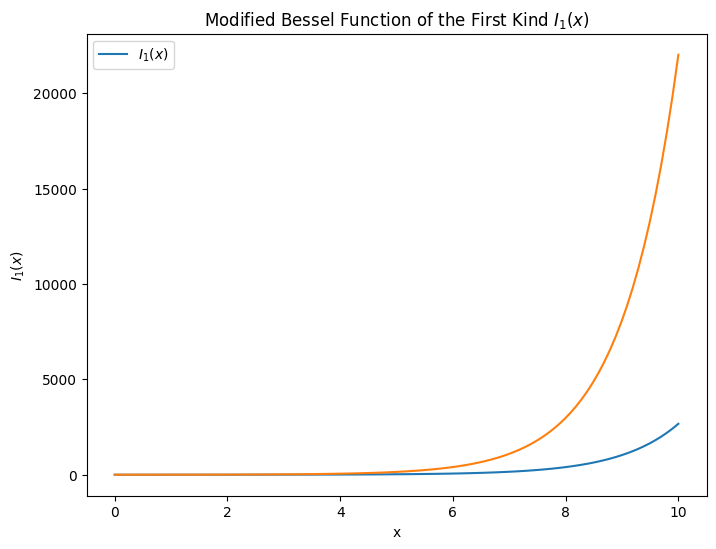

In [8]:
# Define the range of x values
x = np.linspace(0, 10, 100)

# Compute the Bessel function I_1(x)
y = iv(1, x)

# Plot the Bessel function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$I_1(x)$')
plt.plot(x, np.exp(x))
plt.xlabel('x')
plt.ylabel(r'$I_1(x)$')
plt.title('Modified Bessel Function of the First Kind $I_1(x)$')
plt.legend()

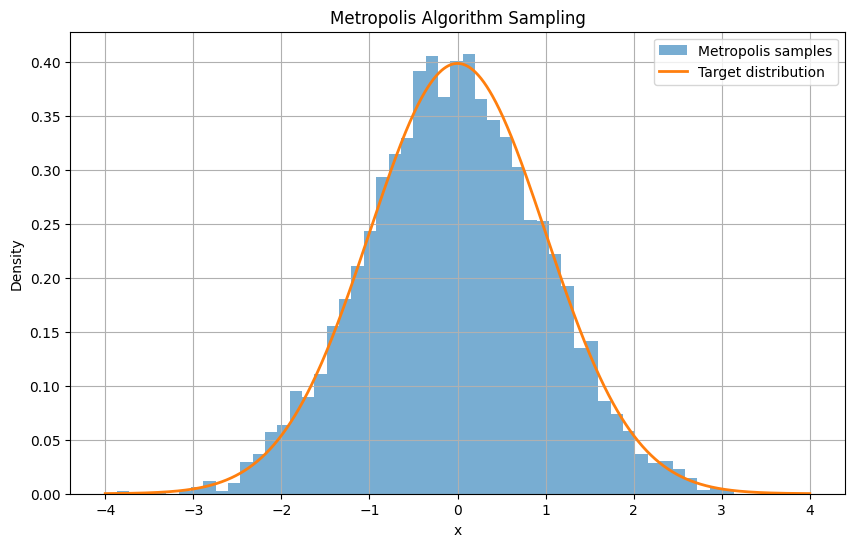

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    """Target distribution: Standard normal distribution."""
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def metropolis_algorithm(initial_state, num_samples, proposal_std):
    """Metropolis algorithm to sample from the target distribution."""
    samples = [initial_state]
    current_state = initial_state
    
    for _ in range(num_samples - 1):
        # Propose a new state from a normal distribution centered at the current state
        proposed_state = np.random.normal(current_state, proposal_std)
        
        # Calculate acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_state) / target_distribution(current_state))
        
        # Accept or reject the proposed state
        if np.random.rand() < acceptance_ratio:
            current_state = proposed_state
        
        samples.append(current_state)
    
    return np.array(samples)

# Parameters
initial_state = 0.0
num_samples = 10000
proposal_std = 1.0

# Run the Metropolis algorithm
samples = metropolis_algorithm(initial_state, num_samples, proposal_std)

# Plot the results
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Metropolis samples')
plt.plot(x, target_distribution(x), label='Target distribution', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Metropolis Algorithm Sampling')
plt.legend()
plt.grid(True)
plt.show()